In [ ]:
%pip install networkx
%pip install bctpy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [63]:
import numpy as np
import bct
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

In [122]:
import numpy as np

# Load the data
correlation_matrix = np.load('condition_matrixes.npy')

# Unpack the data (the averaged correlation matrices for each condition)
graz_matrix = correlation_matrix[0]
neurow_matrix = correlation_matrix[1]
rest_matrix = correlation_matrix[2]


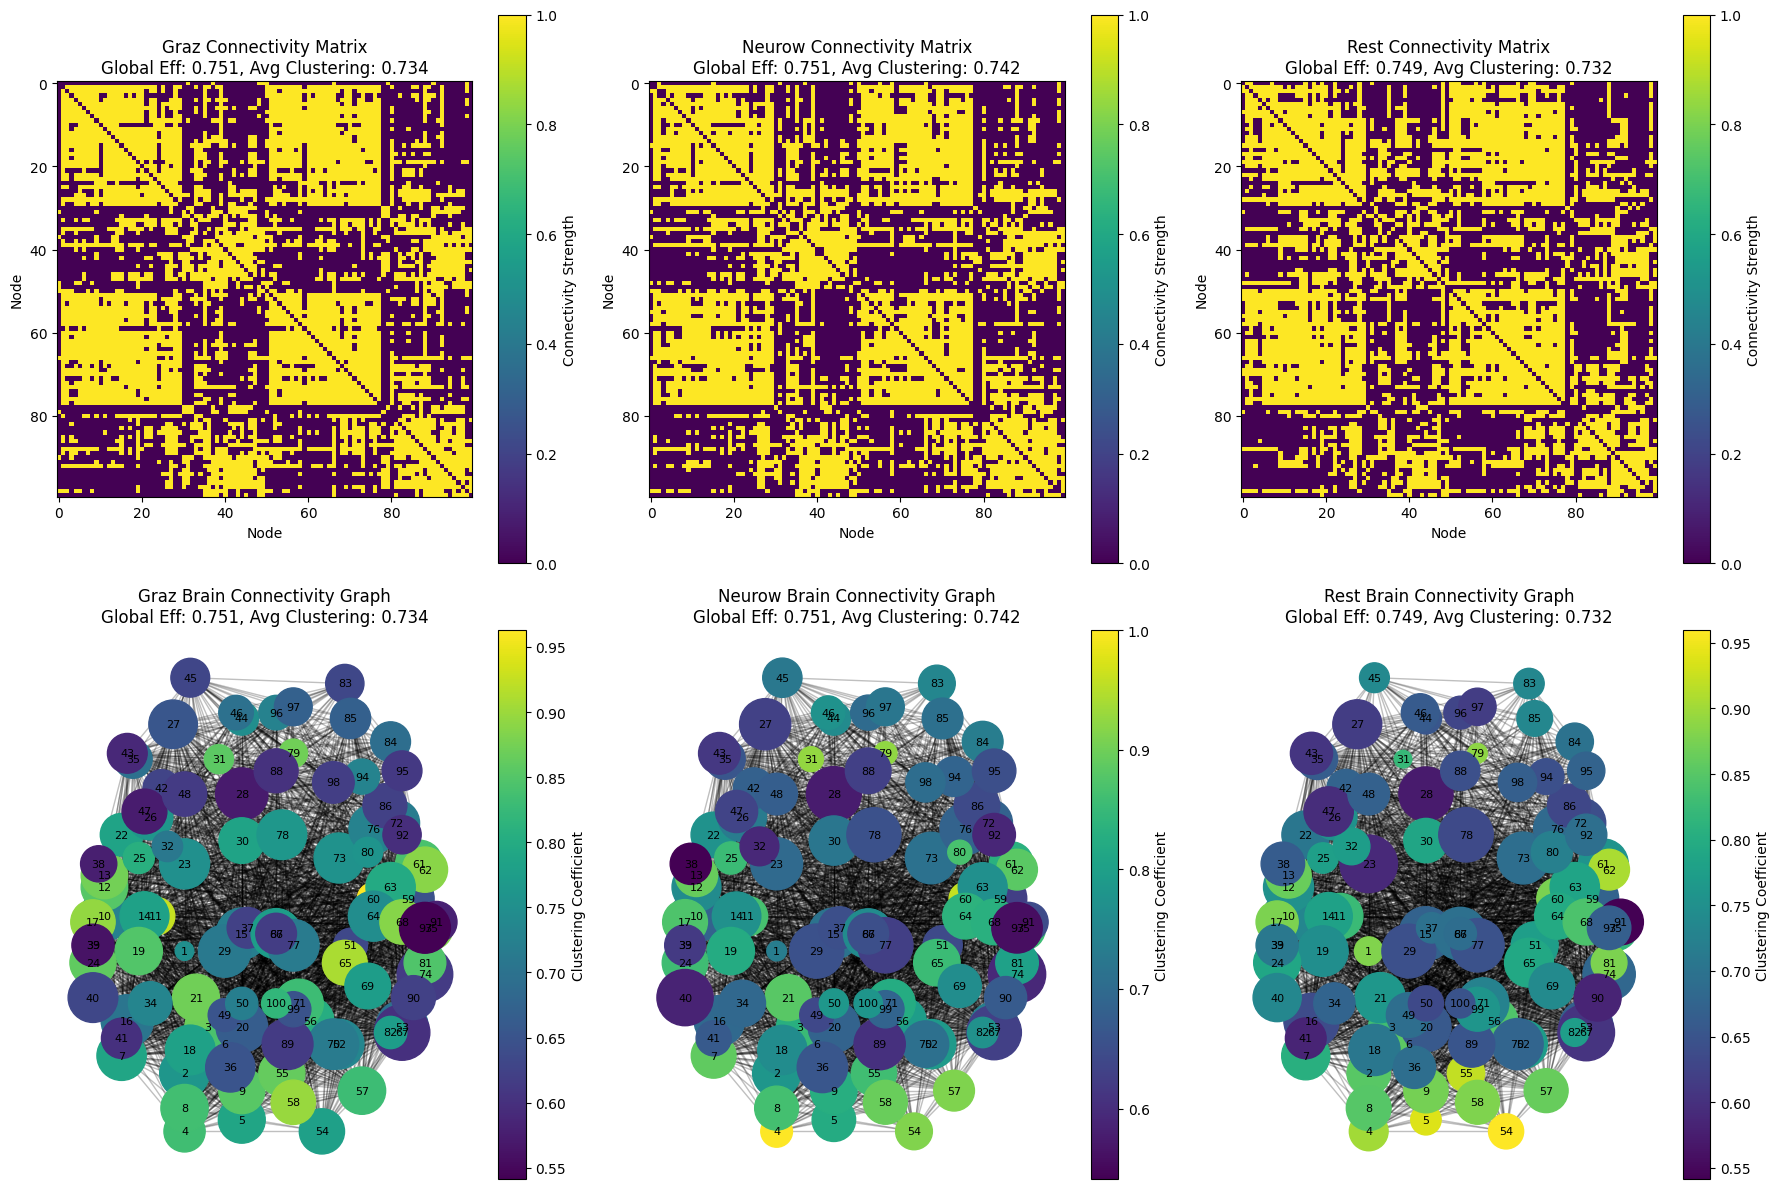

In [133]:
import numpy as np
import bct
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Define the three conditions
conditions = ['Graz', 'Neurow', 'Rest']

# Assuming you have three connectivity matrices defined for each condition
# Replace these variables with your actual matrices
# graz_matrix, neurow_matrix, rest_matrix

# Load the LUT file - this only needs to be done once
csv_file = 'Schaefer_100parcels_7Networks/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv'
with open(csv_file, 'r') as file:
    lut_data = file.readlines()

# Process the LUT file to extract node numbers and coordinates
positions = {}
node_mapping = {}

# Create a dictionary to store the matrices for each condition
matrices = {
    'Graz': graz_matrix,
    'Neurow': neurow_matrix,
    'Rest': rest_matrix
}

# Set threshold for all matrices
threshold = 0.6

# Create a figure with 2 rows and 3 columns (one column per condition)
fig = plt.figure(figsize=(18, 12))

# Process each condition
for idx, condition in enumerate(conditions):
    # Get the connectivity matrix for this condition
    connectivity_matrix = matrices[condition]
    
    # 1. Threshold the matrix using the 50th percentile
    np.fill_diagonal(connectivity_matrix, 0)
    threshold_value = np.percentile(connectivity_matrix, 50)
    thresholded_matrix = connectivity_matrix.copy()
    thresholded_matrix[connectivity_matrix < threshold_value] = 0
    thresholded_matrix[connectivity_matrix >= threshold_value] = 1

    # 3. Convert to NetworkX graph for analysis
    G = nx.from_numpy_array(thresholded_matrix)
    
    # 4. Calculate network metrics
    degrees = [d for n, d in G.degree()]
    clustering_coef = list(nx.clustering(G).values())
    global_efficiency = nx.global_efficiency(G)
    avg_clustering = np.mean(clustering_coef)
    
    # 5. Plot the connectivity matrix with metrics in title
    ax1 = fig.add_subplot(2, 3, idx + 1)
    im = ax1.imshow(thresholded_matrix, cmap='viridis')
    ax1.set_title(f'{condition} Connectivity Matrix\nGlobal Eff: {global_efficiency:.3f}, Avg Clustering: {avg_clustering:.3f}')
    ax1.set_xlabel('Node')
    ax1.set_ylabel('Node')
    plt.colorbar(im, ax=ax1, label='Connectivity Strength')
    
    # 6. Map node positions from LUT file
    # Reset positions for each graph
    positions = {}
    graph_nodes = list(G.nodes())
    
    for i, line in enumerate(lut_data):
        if i == 0:  # Skip the header line
            continue
        if i > len(graph_nodes):  # Ensure we don't exceed the number of nodes in the graph
            break
        parts = line.strip().split(',')
        node_number = int(parts[0])  # First value is the node number
        x_coord = float(parts[2])   # Third value is the R-coordinate
        y_coord = float(parts[3])   # Fourth value is the A-coordinate
        
        # Map the LUT node number to the graph node ID
        node_mapping[node_number] = graph_nodes[i - 1]
        # Assign positions using graph node IDs
        positions[graph_nodes[i - 1]] = (x_coord, y_coord)
    
    # 7. Visualize the graph with metrics in title
    ax2 = fig.add_subplot(2, 3, idx + 4)
    
    # Draw nodes with size based on degree and color based on clustering coefficient
    node_size = [deg * 20 for deg in degrees]
    nodes = nx.draw_networkx_nodes(G, positions, node_size=node_size, node_color=clustering_coef, cmap=plt.cm.viridis, ax=ax2)
    
    # Add node labels with node numbers
    nx.draw_networkx_labels(G, positions, labels={n: n+1 for n in G.nodes()}, font_size=8, ax=ax2)
    # Draw edges
    edge_width = [1 for u, v in G.edges()]  # Fixed width for binary matrix
    nx.draw_networkx_edges(G, positions, width=edge_width, alpha=0.25, ax=ax2)
    
    # Add a colorbar
    sm = ScalarMappable(cmap=plt.cm.viridis, norm=Normalize(vmin=min(clustering_coef), vmax=max(clustering_coef)))
    sm.set_array([])
    plt.colorbar(sm, ax=ax2, label='Clustering Coefficient')
    
    ax2.set_title(f'{condition} Brain Connectivity Graph\nGlobal Eff: {global_efficiency:.3f}, Avg Clustering: {avg_clustering:.3f}')
    ax2.axis('off')
    
    # Print network metrics for each condition
    #print(f"{condition} Global Efficiency: {global_efficiency}")
    #print(f"{condition} Average Clustering Coefficient: {avg_clustering}")

plt.tight_layout()
plt.show()

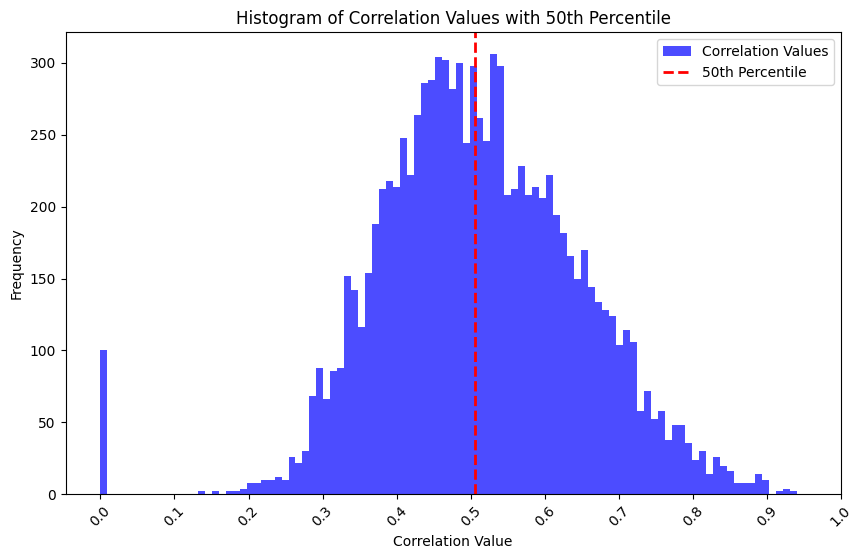

In [142]:
# Plot the histogram of correlation values
plt.figure(figsize=(10, 6))
plt.hist(correlation_values, bins=100, color='blue', alpha=0.7, label='Correlation Values')

# Add a vertical line at the 50th percentile
plt.axvline(x=percentile_50, color='red', linestyle='--', linewidth=2, label='50th Percentile')

# Add labels and legend
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=10, rotation=45)
plt.title('Histogram of Correlation Values with 50th Percentile')
plt.legend()

# Add x-axis legend
plt.xticks(fontsize=10, rotation=45)

# Show the plot
plt.show()